In [9]:
import os, glob, random

filepath = "dataset"
img = glob.glob(os.path.join(filepath, '*/*.jpg'))
print(len(img))

2527


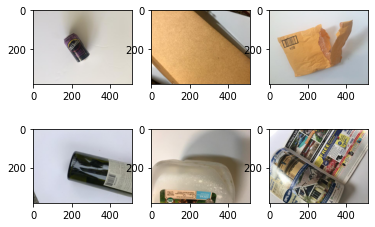

In [86]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import numpy as np
import matplotlib.pyplot as plt

pathdir = os.listdir(filepath)
path = []
samples = []
for i in pathdir:
    path.append(filepath + "/" + i)
path = path[:-1]
for label in path:
    sample = random.sample(os.listdir(label), 1)
    sample = [label + "/" + i for i in sample]
    samples += sample

for i,imgpath in enumerate(samples):
    img = load_img(imgpath)
    img = img_to_array(img, dtype=np.uint8)

    plt.subplot(2, 3, i+1)
    plt.imshow(img.squeeze())

In [105]:
#图像增广
train_datagen = ImageDataGenerator(
        rotation_range=45,#数据提升时图片随机转动的角度
        rescale=1./255,#重放缩因子
        width_shift_range=0.1,#图片宽度的某个比例，数据提升时图片水平偏移的幅度
        height_shift_range=0.1,#图片高度的某个比例，数据提升时图片竖直偏移的幅度
        shear_range=0.1,#剪切强度（逆时针方向的剪切变换角度）
        zoom_range=0.1,#随机缩放的幅度
        horizontal_flip=True,#进行随机水平翻转
        vertical_flip = True,#进行随机竖直翻转
        fill_mode='constant',#当进行变换时超出边界的点将根据本参数给定的方法进行处理
        validation_split=0.1)
test_datagen = ImageDataGenerator(
        rescale=1./255, 
        validation_split=0.1)
train = train_datagen.flow_from_directory(
    filepath, target_size=(300, 300), batch_size=16,
    class_mode='categorical', subset='training', seed=1)
validation = test_datagen.flow_from_directory(
    filepath, target_size=(300, 300), batch_size=16,
    class_mode='categorical', subset='validation', seed=1)

labels = (train.class_indices)
labels = dict((v,k) for k,v in labels.items())

Found 2276 images belonging to 6 classes.
Found 251 images belonging to 6 classes.


In [106]:
labels

{0: 'cardboard', 1: 'glass', 2: 'metal', 3: 'paper', 4: 'plastic', 5: 'trash'}

In [111]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(300, 300, 3)))

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))

model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(64, activation='relu'))

model.add(Dense(6, activation='softmax'))

model.summary()
# compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 300, 300, 32)      896       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 150, 150, 32)      0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 150, 150, 64)      18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 37, 37, 32)       

In [112]:
model.fit_generator(train, epochs=100, steps_per_epoch=2276//32,validation_data=validation,
                    validation_steps=251//32)

Epoch 1/100
71/71 [==============================] - 99s 1s/step - loss: 1.7587 - acc: 0.2168 - val_loss: 1.6652 - val_acc: 0.2232
Epoch 2/100
71/71 [==============================] - 97s 1s/step - loss: 1.6109 - acc: 0.2974 - val_loss: 1.6812 - val_acc: 0.2768
Epoch 3/100
71/71 [==============================] - 96s 1s/step - loss: 1.5144 - acc: 0.3935 - val_loss: 1.6196 - val_acc: 0.3214
Epoch 4/100
71/71 [==============================] - 92s 1s/step - loss: 1.5239 - acc: 0.3403 - val_loss: 1.5878 - val_acc: 0.3036
Epoch 5/100
71/71 [==============================] - 91s 1s/step - loss: 1.4852 - acc: 0.3648 - val_loss: 1.7166 - val_acc: 0.2857
Epoch 6/100
71/71 [==============================] - 92s 1s/step - loss: 1.4340 - acc: 0.4273 - val_loss: 1.4121 - val_acc: 0.4286
Epoch 7/100
71/71 [==============================] - 91s 1s/step - loss: 1.4180 - acc: 0.4336 - val_loss: 1.4469 - val_acc: 0.4554
Epoch 8/100
71/71 [==============================] - 92s 1s/step - loss: 1.3188 - a

Epoch 63/100
71/71 [==============================] - 75s 1s/step - loss: 0.6225 - acc: 0.8001 - val_loss: 1.0729 - val_acc: 0.7321
Epoch 64/100
71/71 [==============================] - 75s 1s/step - loss: 0.6961 - acc: 0.7642 - val_loss: 0.7531 - val_acc: 0.7321
Epoch 65/100
71/71 [==============================] - 75s 1s/step - loss: 0.6559 - acc: 0.7730 - val_loss: 0.8099 - val_acc: 0.7321
Epoch 66/100
71/71 [==============================] - 77s 1s/step - loss: 0.6446 - acc: 0.7705 - val_loss: 0.8185 - val_acc: 0.6696
Epoch 67/100
71/71 [==============================] - 70s 979ms/step - loss: 0.6663 - acc: 0.7595 - val_loss: 0.7894 - val_acc: 0.7679
Epoch 68/100
71/71 [==============================] - 70s 986ms/step - loss: 0.6181 - acc: 0.7654 - val_loss: 0.8721 - val_acc: 0.6518
Epoch 69/100
71/71 [==============================] - 70s 986ms/step - loss: 0.6288 - acc: 0.7780 - val_loss: 0.7633 - val_acc: 0.7411
Epoch 70/100
71/71 [==============================] - 96s 1s/step -

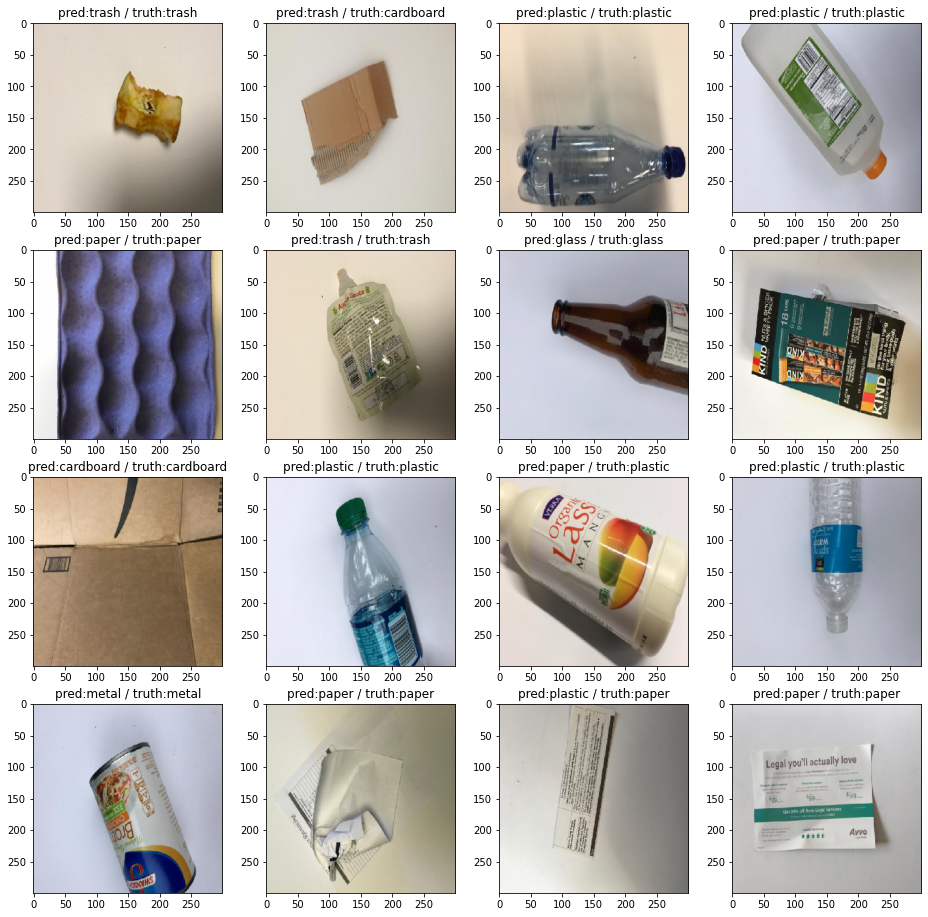

In [113]:
test_x, test_y = validation.__getitem__(1)
preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])

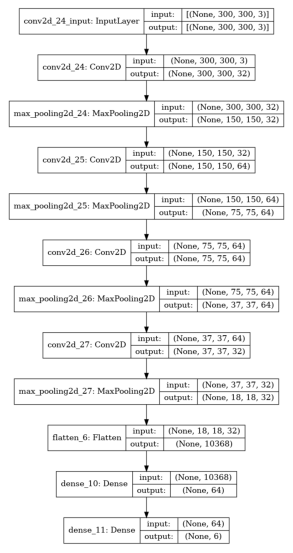

In [115]:
from keras.utils.vis_utils import plot_model

def read_image(fn):
    img = load_img(fn)
    img = img_to_array(img) 
    return img

plot_model(model, to_file='model.png', show_shapes=True)

img = read_image('model.png')

# original image
plt.subplots(figsize=(5,10))
plt.subplot(111)
plt.axis('off')
plt.imshow(array_to_img(img))